## CMIP6 Fire Weather Indices EDA

This notebook investigates some of the input files from this data release:

> Young, A.M., Littell, J., and Rupp, S., 2025, The influence of fire-fuel feedbacks on boreal forest fire regimes under future climate change: U.S. Geological Survey data release, https://doi.org/10.5066/P1AAMRUF 

This notebook shows that:
- we have the full set of bias-corrected CMIP6 daily data for all years (1980-2100) on ARDN
- we have the full set of CMIP6 derived daily Fire Weather Indicies (CMIP6-FWI) for all years (1980-2100) on ARDN
- we have the ERA5 derived daily Fire Weather Indices (ERA5-FWI) on ARDN for 1979-2020
- the spatial domain of the bias-corrected CMIP6 and CMIP6-FWI data is clipped to a boreal ecoregion polygon extent
- the spatial domain of the ERA5-FWI is a full gridded coverage from 35 to 80 latitude and -35 to -177 longitude


### File audit

In [ ]:
import os
from pathlib import Path
import xarray as xr

In [2]:
fwi_data_dir = "/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi"
bc_data_dir = "/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/"

In [3]:
# fwi model subdirectories contain one NC file per year, named like cffdrs_<model>_YYYY.nc
# for each model subdirectory, list the NC files and check years
# for each model subdirectory, print start year, end year, number of years, and true/false if there are any missing years in the sequence

def check_fwi_model_years(model_dir):
    model_path = Path(model_dir)
    if not model_path.is_dir():
        print(f"{model_dir} is not a valid directory.")
        return

    nc_files = sorted(model_path.glob("cffdrs_*.nc"))
    if not nc_files:
        print(f"No NC files found in {model_dir}.")
        return

    years = []
    for nc_file in nc_files:
        filename = nc_file.name
        try:
            year = int(filename.split("_")[-1].split(".")[0])
            years.append(year)
        except ValueError:
            print(f"Filename {filename} does not conform to expected format.")

    if not years:
        print(f"No valid years found in filenames in {model_dir}.")
        return

    start_year = min(years)
    end_year = max(years)
    num_years = len(years)
    expected_years = set(range(start_year, end_year + 1))
    actual_years = set(years)
    missing_years = expected_years - actual_years
    has_missing_years = len(missing_years) > 0

    print(f"Model Directory: {model_dir}")
    print(f"Start Year: {start_year}")
    print(f"End Year: {end_year}")
    print(f"Number of Years: {num_years}")
    print(f"Missing Years: {sorted(missing_years)}")
    print(f"Has Missing Years: {has_missing_years}")
    print()

In [4]:
# for each model subdirectory, list the NC files and check years
# for each model subdirectory, and for each variable found, print start year, end year, number of years, and true/false if there are any missing years in the sequence

def check_bc_model_years(model_dir):
    model_path = Path(model_dir)
    if not model_path.is_dir():
        print(f"{model_dir} is not a valid directory.")
        return
    nc_files = sorted(model_path.glob("*.nc"))
    if not nc_files:
        print(f"No NC files found in {model_dir}.")
        return
    variable_years = {}
    for nc_file in nc_files:
        filename = nc_file.name
        parts = filename.split("_")
        if len(parts) < 3:
            print(f"Filename {filename} does not conform to expected format.")
            continue
        variable = "_".join(parts[:-2])
        try:
            year = int(parts[-1].split(".")[0])
            if variable not in variable_years:
                variable_years[variable] = set()
            variable_years[variable].add(year)
        except ValueError:
            print(f"Filename {filename} does not conform to expected format.")
    # Print info for each variable separately
    for variable, years_set in variable_years.items():
        if not years_set:
            continue
        years = sorted(years_set)
        start_year = min(years)
        end_year = max(years)
        num_years = len(years)
        expected_years = set(range(start_year, end_year + 1))
        actual_years = set(years)
        missing_years = expected_years - actual_years
        has_missing_years = len(missing_years) > 0

        print(f"Model Directory: {model_dir}")
        print(f"Variable: {variable}")
        print(f"Start Year: {start_year}")
        print(f"End Year: {end_year}")
        print(f"Number of Years: {num_years}")
        print(f"Missing Years: {sorted(missing_years)}")
        print(f"Has Missing Years: {has_missing_years}")
        print()

In [5]:
# FWI data check
# run the check for each model subdirectory in the data directory

for model_subdir in os.listdir(fwi_data_dir):
    model_path = os.path.join(fwi_data_dir, model_subdir)
    check_fwi_model_years(model_path)

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/CNRM-CM6-1-HR
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/era5
Start Year: 1979
End Year: 2020
Number of Years: 42
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/EC-Earth3-Veg
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/MRI-ESM2-0
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/MPI-ESM1-2-HR
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False



In [6]:
# BC data check

for model_subdir in os.listdir(bc_data_dir):
    model_path = os.path.join(bc_data_dir, model_subdir)
    check_bc_model_years(model_path)

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/MPI-ESM1-2-HR
Variable: hursmin
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/MPI-ESM1-2-HR
Variable: pr
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/MPI-ESM1-2-HR
Variable: sfcWind
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/MPI-ESM1-2-HR
Variable: tasmax
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing Years: False

Model Directory: /beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/CNRM-CM6-1-HR
Variable: hursmin
Start Year: 1980
End Year: 2099
Number of Years: 120
Missing Years: []
Has Missing 

### Data Attributes and Spatial Domains

In [34]:
# list all the NC files in the fwi data subdirectories 
fwi_files = []
for model_subdir in os.listdir(fwi_data_dir):
    model_path = os.path.join(fwi_data_dir, model_subdir)
    if os.path.isdir(model_path):
        for nc_file in os.listdir(model_path):
            if nc_file.endswith(".nc"):
                fwi_files.append(os.path.join(model_path, nc_file))

# list all the NC files in the bc data subdirectories 
bc_files = []
for model_subdir in os.listdir(bc_data_dir):
    model_path = os.path.join(bc_data_dir, model_subdir)
    if os.path.isdir(model_path):
        for nc_file in os.listdir(model_path):
            if nc_file.endswith(".nc"):
                bc_files.append(os.path.join(model_path, nc_file))

In [36]:
# check out a CMIP6 FWI file
print(fwi_files[0])
ds = xr.open_dataset(fwi_files[0])
ds

/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/CNRM-CM6-1-HR/cffdrs_CNRM-CM6-1-HR_2094.nc


<xarray.Dataset> Size: 887MB
Dimensions:  (time: 365, lat: 178, lon: 569)
Coordinates:
  * time     (time) object 3kB 2094-01-01 12:00:00 ... 2094-12-31 12:00:00
  * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 78.5 78.75 79.0 79.25
  * lon      (lon) float64 5kB -177.0 -176.8 -176.5 ... -35.5 -35.25 -35.0
Data variables:
    ffmc     (time, lat, lon) float32 148MB ...
    dmc      (time, lat, lon) float32 148MB ...
    dc       (time, lat, lon) float32 148MB ...
    isi      (time, lat, lon) float32 148MB ...
    bui      (time, lat, lon) float32 148MB ...
    fwi      (time, lat, lon) float32 148MB ...

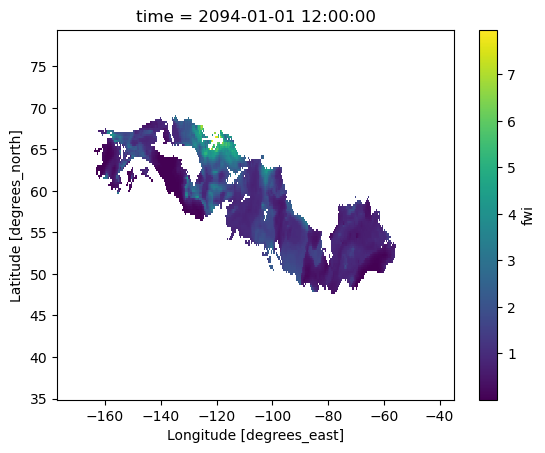

In [37]:
ds['fwi'].isel(time=0).plot()

In [38]:
# check out an ERA5 FWI file
print(fwi_files[150])
ds = xr.open_dataset(fwi_files[150])
ds

/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/era5/cffdrs_era5_2015.nc


<xarray.Dataset> Size: 887MB
Dimensions:  (time: 365, lat: 178, lon: 569)
Coordinates:
  * time     (time) object 3kB 2015-01-01 00:00:00 ... 2015-12-31 00:00:00
  * lat      (lat) float32 712B 35.0 35.25 35.5 35.75 ... 78.5 78.75 79.0 79.25
  * lon      (lon) float32 2kB -177.0 -176.8 -176.5 ... -35.5 -35.25 -35.0
Data variables:
    ffmc     (time, lat, lon) float32 148MB ...
    dmc      (time, lat, lon) float32 148MB ...
    dc       (time, lat, lon) float32 148MB ...
    isi      (time, lat, lon) float32 148MB ...
    bui      (time, lat, lon) float32 148MB ...
    fwi      (time, lat, lon) float32 148MB ...

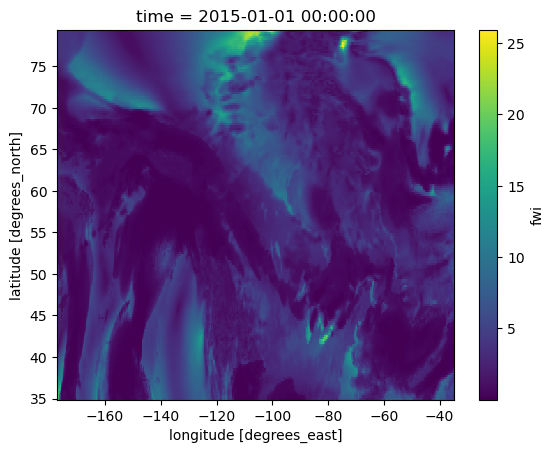

In [39]:
ds['fwi'].isel(time=0).plot()

In [41]:
# check out a CMIP6 BC file
print(bc_files[0])
ds = xr.open_dataset(bc_files[0])
ds

/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_bias_corrected/MPI-ESM1-2-HR/hursmin_MPI-ESM1-2-HR_2001.nc


<xarray.Dataset> Size: 148MB
Dimensions:  (time: 365, lat: 178, lon: 569)
Coordinates:
  * time     (time) object 3kB 2001-01-01 12:00:00 ... 2001-12-31 12:00:00
  * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 78.5 78.75 79.0 79.25
  * lon      (lon) float64 5kB -177.0 -176.8 -176.5 ... -35.5 -35.25 -35.0
Data variables:
    hursmin  (time, lat, lon) float32 148MB ...

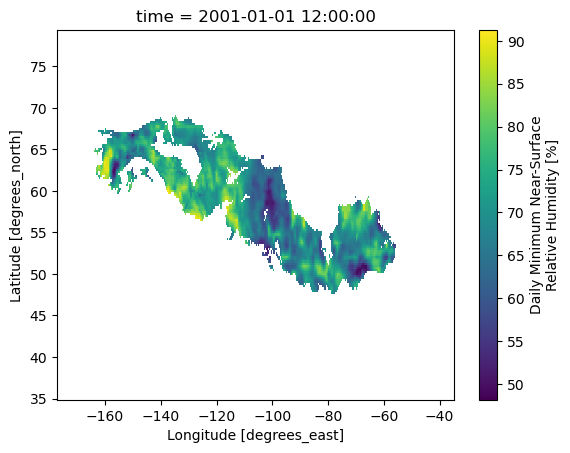

In [42]:
ds['hursmin'].isel(time=0).plot()

### What Ecoregions?

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# global ecoregions from this dataset: https://doi.org/10.1641/0006-3568(2001)051[0933:TEOTWA]2.0.CO;2
# NOT the same as EPA ecoregions that SNAP has been using in the API!

shp_file = '/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/ecoregions/ecoregions/ecos.shp'
ecoregions = gpd.read_file(shp_file)

print(ecoregions['ECO_NAME'].unique())

['Central Canadian Shield forests' 'Eastern Canadian forests'
 'Eastern Canadian Shield taiga' 'Interior Alaska-Yukon lowland taiga'
 'Mid-Continental Canadian forests' 'Midwestern Canadian Shield forests'
 'Muskwa-Slave Lake forests' 'Northern Canadian Shield taiga'
 'Northern Cordillera forests' 'Northwest Territories taiga'
 'Southern Hudson Bay taiga' 'Interior Yukon-Alaska alpine tundra']


/beegfs/CMIP6/arctic-cmip6/cmip6_fwi/cmip6_fwi/CNRM-CM6-1-HR/cffdrs_CNRM-CM6-1-HR_2094.nc


<Axes: title={'center': 'time = 2094-01-01 12:00:00'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

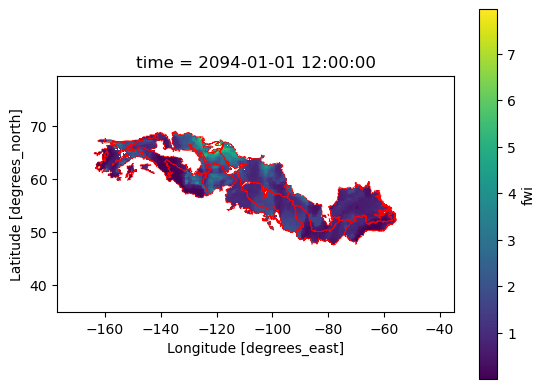

In [ ]:
# plot the ecoregions polygon on top of a slice of FWI data
print(fwi_files[0])
ds = xr.open_dataset(fwi_files[0])
ds['fwi'].isel(time=0).plot()
ecoregions.boundary.plot(ax=plt.gca(), color='red', linewidth=.5)